### TasK -2

### K means Clustering algorithm for customer segmentation

dataset- https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

#### Reading the data

In [5]:
df=pd.read_csv('Mall_Customers.csv',index_col=0,header=0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [7]:
print(df.shape)
print()
print(df.info())

(200, 4)

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB
None


In [9]:
print(df.isnull().sum())
print()
print(df.describe(include='all'))

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

        Gender         Age  Annual Income (k$)  Spending Score (1-100)
count      200  200.000000          200.000000              200.000000
unique       2         NaN                 NaN                     NaN
top     Female         NaN                 NaN                     NaN
freq       112         NaN                 NaN                     NaN
mean       NaN   38.850000           60.560000               50.200000
std        NaN   13.969007           26.264721               25.823522
min        NaN   18.000000           15.000000                1.000000
25%        NaN   28.750000           41.500000               34.750000
50%        NaN   36.000000           61.500000               50.000000
75%        NaN   49.000000           78.000000               73.000000
max        NaN   70.000000          137.000000               99.000000


we will use annual income and spend score vars for building initial model(since offer given by manager maybe not gender specific)

In [10]:
X=df.values[:,[2,3]]

In [11]:
X

array([[15, 39],
       [15, 81],
       [16, 6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18, 6],
       [18, 94],
       [19, 3],
       [19, 72],
       [19, 14],
       [19, 99],
       [20, 15],
       [20, 77],
       [20, 13],
       [20, 79],
       [21, 35],
       [21, 66],
       [23, 29],
       [23, 98],
       [24, 35],
       [24, 73],
       [25, 5],
       [25, 73],
       [28, 14],
       [28, 82],
       [28, 32],
       [28, 61],
       [29, 31],
       [29, 87],
       [30, 4],
       [30, 73],
       [33, 4],
       [33, 92],
       [33, 14],
       [33, 81],
       [34, 17],
       [34, 73],
       [37, 26],
       [37, 75],
       [38, 35],
       [38, 92],
       [39, 36],
       [39, 61],
       [39, 28],
       [39, 65],
       [40, 55],
       [40, 47],
       [40, 42],
       [40, 42],
       [42, 52],
       [42, 60],
       [43, 54],
       [43, 60],
       [43, 45],
       [43, 41],
       [44, 50],
       [44, 46],
       [46, 51],
   

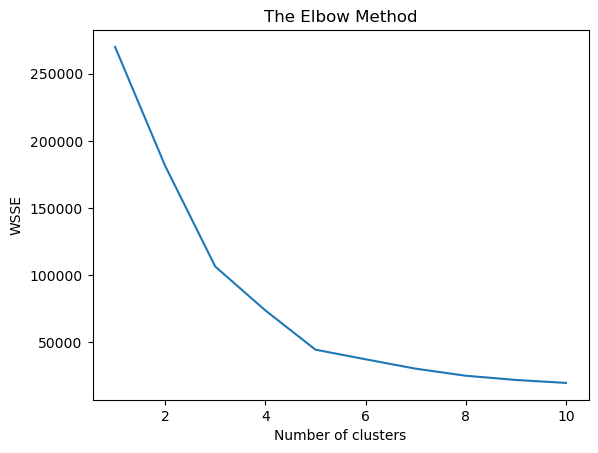

In [12]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
 
wsse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,  random_state = 10) # initial clustered centroid hence randome state
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)
plt.plot(range(1, 11), wsse)
#plt.scatter(range(1, 11),wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

In [13]:
print(wsse)

[269981.28, 181363.595959596, 106348.3730621112, 73679.78903948834, 44448.45544793371, 37271.886236589504, 30273.39431207004, 25022.485004530354, 21881.878507060967, 19669.710998301216]


#### to build model optimum value of k should be 5


In [14]:
#fitting K-means to the dataset

kmeans=KMeans(n_clusters=5,random_state=10)
Y_pred=kmeans.fit_predict(X)


#kmeans.fit(X)--> training
#Y_pred=kmeans.fit_predict(X)--->predicting


In [15]:
Y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [16]:
kmeans.inertia_ 

44448.45544793371

In [17]:
kmeans.n_iter_  # no. of iterations 

5

#### convert unlabelled data to labelled

In [18]:
df['clusters']=Y_pred
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
CustomerID,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,0
3,Female,20,16,6,3
4,Female,23,16,77,0
5,Female,31,17,40,3
6,Female,22,17,76,0
7,Female,35,18,6,3
8,Female,23,18,94,0
9,Male,64,19,3,3


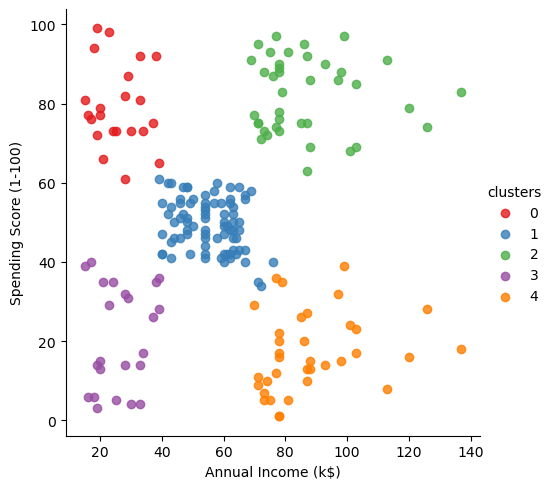

In [21]:
sns.lmplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
           fit_reg=False, # No regression line
           hue='clusters',palette="Set1")  
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
#s = 300, c = 'black')
plt.show()

#### The optimum number of clusters is 5

In [30]:
kmeans.n_clusters

5

In [ ]:
kmeans.n_clusters

In [23]:
df['clusters']=df.clusters.replace({0:'Careless',1:'Standard',2:'Target',3:'Sensible',4:'Careful'})

In [24]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
CustomerID,,,,,
1,Male,19,15,39,Sensible
2,Male,21,15,81,Careless
3,Female,20,16,6,Sensible
4,Female,23,16,77,Careless
5,Female,31,17,40,Sensible


In [26]:
new_df=df[df['clusters']=='Target']

In [27]:
new_df.shape

(39, 5)

In [28]:
new_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
CustomerID,,,,,
124,Male,39,69,91,Target
126,Female,31,70,77,Target
128,Male,40,71,95,Target
130,Male,38,71,75,Target
132,Male,39,71,75,Target
134,Female,31,72,71,Target
136,Female,29,73,88,Target
138,Male,32,73,73,Target
140,Female,35,74,72,Target


In [29]:
new_df.to_excel(r'TargetCustomers.xlsx',index=True)